In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("bank-full.csv",sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Handling The Categorical Features

In [8]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [9]:
df["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [10]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [11]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [12]:
df['housing']=df['housing'].map({'yes':1,'no':0})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,1,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,1,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,1,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,1,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,0,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,0,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,0,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,0,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,0,no,telephone,17,nov,508,4,-1,0,unknown,no


In [13]:
df['default']=df['default'].map({'yes':1,'no':0})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,1,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,0,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,0,1729,0,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,0,5715,0,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,0,668,0,no,telephone,17,nov,508,4,-1,0,unknown,no


In [14]:
df['loan']=df['loan'].map({'yes':1,'no':0})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,no


In [15]:
df['y']=df['y'].map({'yes':1,'no':0})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [16]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

# Feature Relationship using Plot

In [17]:
plt.rcParams['figure.figsize']=(20,6)

<AxesSubplot:xlabel='age', ylabel='y'>

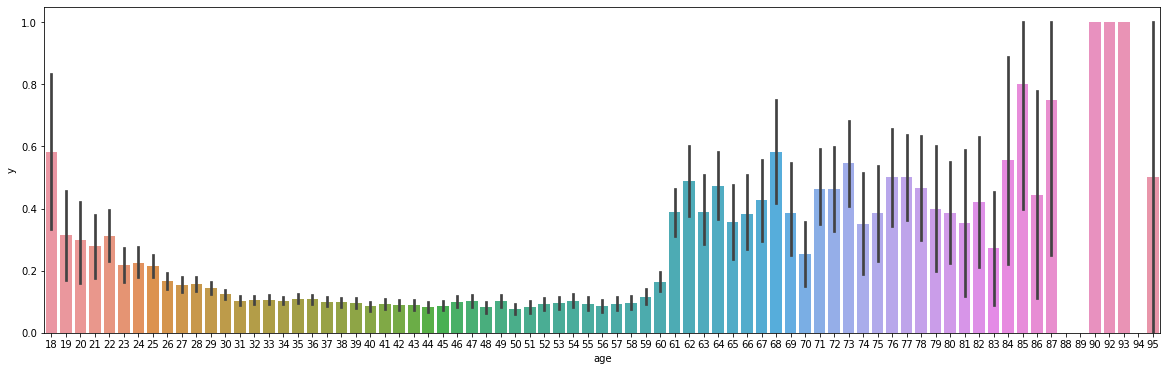

In [18]:
sns.barplot('age','y',data=df)

# Obsevation:
In this graph we can see heavy outliers but the age between 18,90,92,and 93 we can see that these are the age groups have more subscribe term deposits than any other age groups

<AxesSubplot:xlabel='job', ylabel='y'>

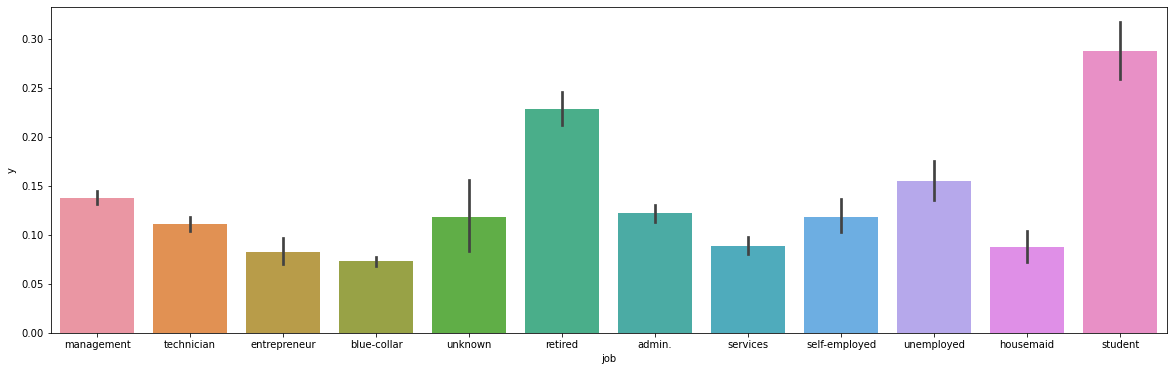

In [19]:
sns.barplot('job','y',data=df)

# Observation:
In this graph we can see the outliers and we can also see that the Retired and the students groups are more subscribed term deposit

<AxesSubplot:xlabel='housing', ylabel='y'>

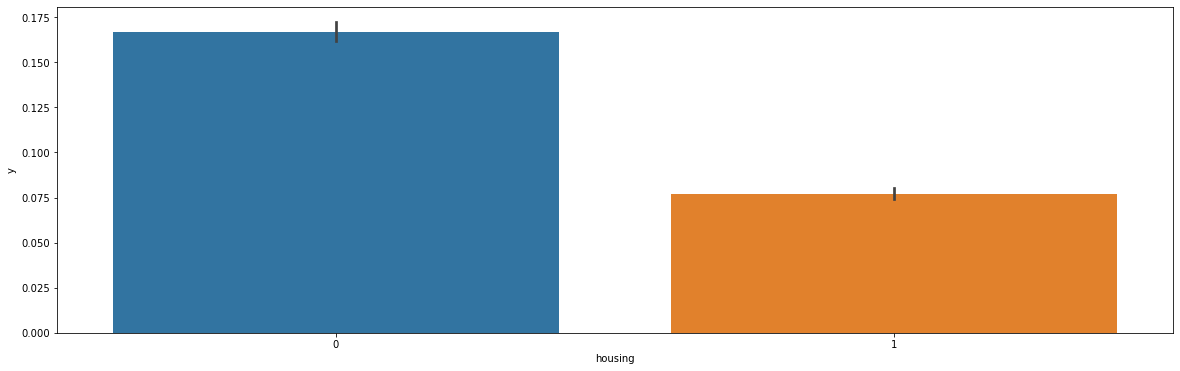

In [20]:
sns.barplot('housing','y',data=df)

# Observation
In this graph we can see that the clients does not having housing more subscribed term deposits than the clients which have housing

<AxesSubplot:xlabel='marital', ylabel='y'>

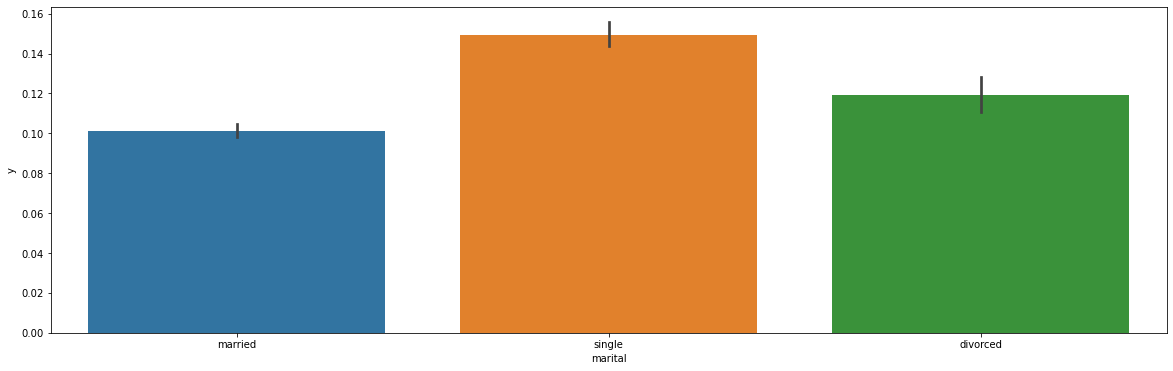

In [21]:
sns.barplot('marital','y',data=df)

# Observation:
In this graph we can see that the client which have Marital status single have more subscribe the term deposit

<AxesSubplot:xlabel='poutcome', ylabel='y'>

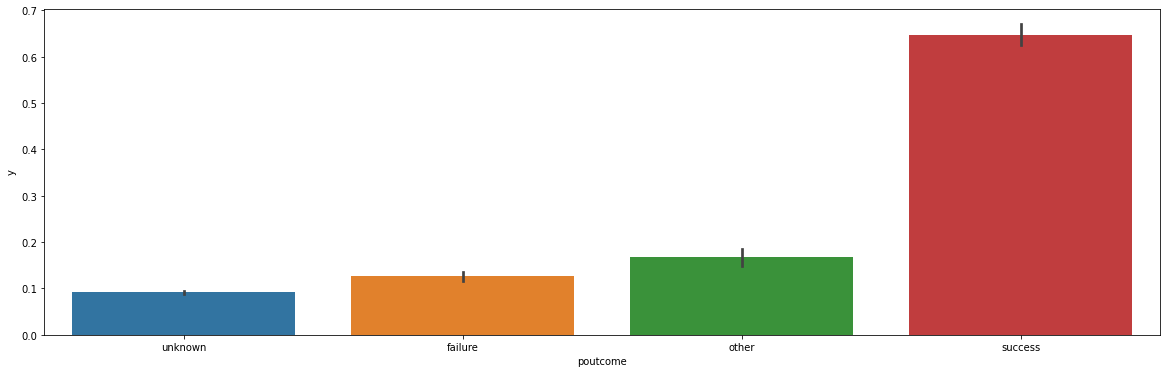

In [22]:
sns.barplot('poutcome','y',data=df)

# Observation:
In this graph the previous data outcome which we can see that more people successfully subscribe the term deposit

<AxesSubplot:xlabel='education', ylabel='y'>

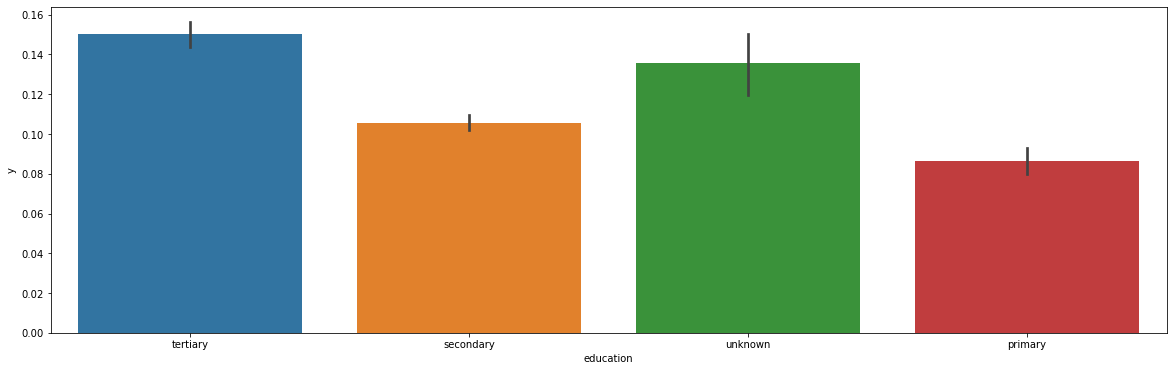

In [23]:
sns.barplot('education','y',data=df)

# Observation:
In this graph the tertiary sector have more subscribe the term deposit

<AxesSubplot:xlabel='default', ylabel='y'>

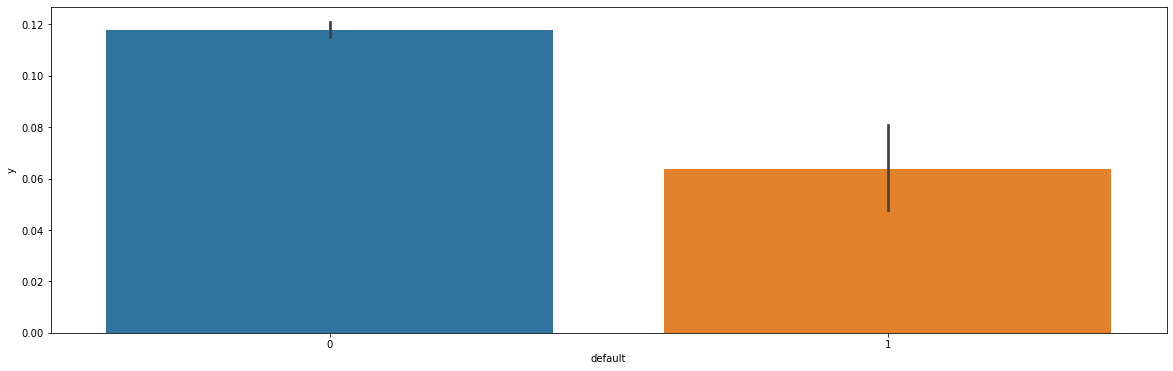

In [24]:
sns.barplot('default','y',data=df)

# Observation:
In this graph we can see that the client which are not default they have subscribe the term deposit

<AxesSubplot:xlabel='y', ylabel='balance'>

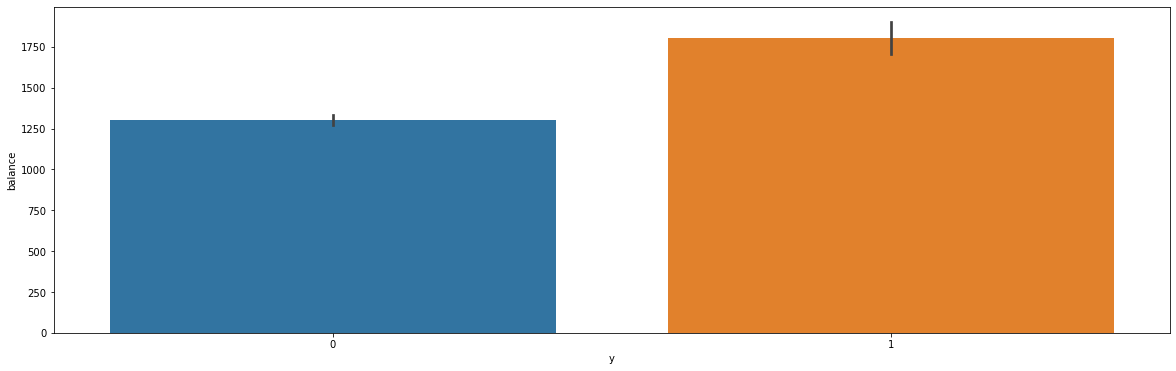

In [25]:
sns.barplot('y','balance',data = df)

# Observation:
In this graph we can see that the client which have more balance they have subscribe the term deposit

<AxesSubplot:xlabel='contact', ylabel='y'>

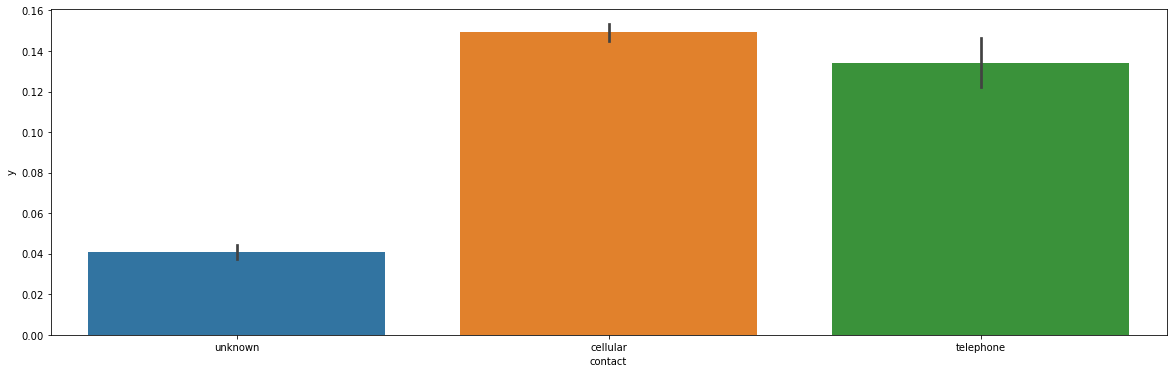

In [26]:
sns.barplot('contact','y',data=df)

# Observation:
In this graph we can see that the client which was contacted by cellular they have more subcribe the term deposit

<AxesSubplot:xlabel='day', ylabel='y'>

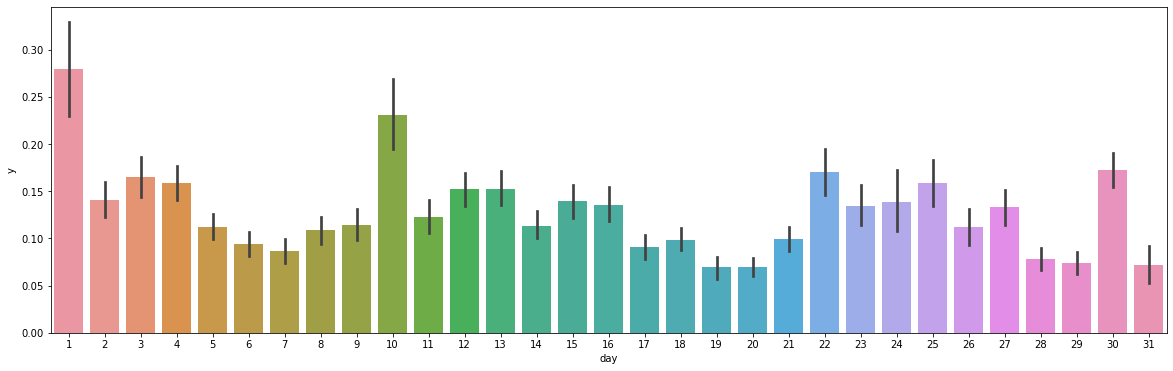

In [27]:
sns.barplot("day",'y',data=df)

# Observation:
In this graph we can see that on day 1 more number of people subscribe the term deposit

<AxesSubplot:xlabel='month', ylabel='y'>

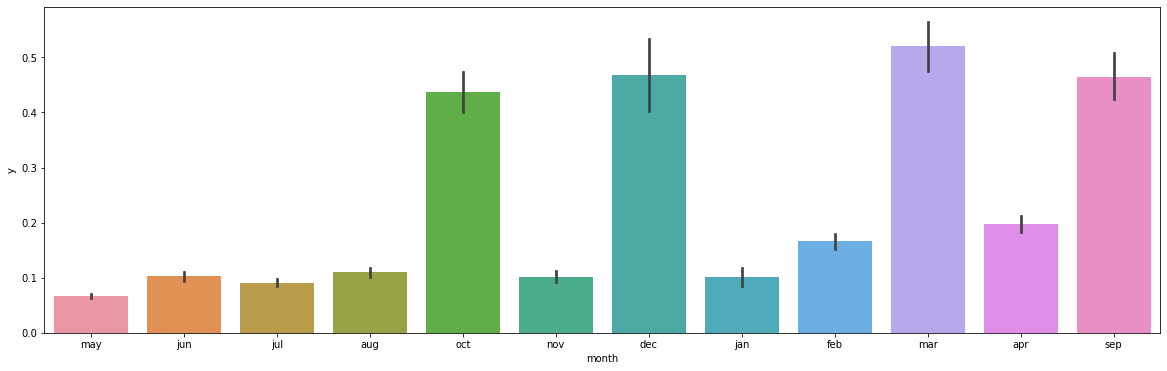

In [28]:
sns.barplot('month','y',data=df)

# Observation:
In this graph we can see that more number of people subscribe the term deposit in the mont of march

<AxesSubplot:xlabel='campaign', ylabel='y'>

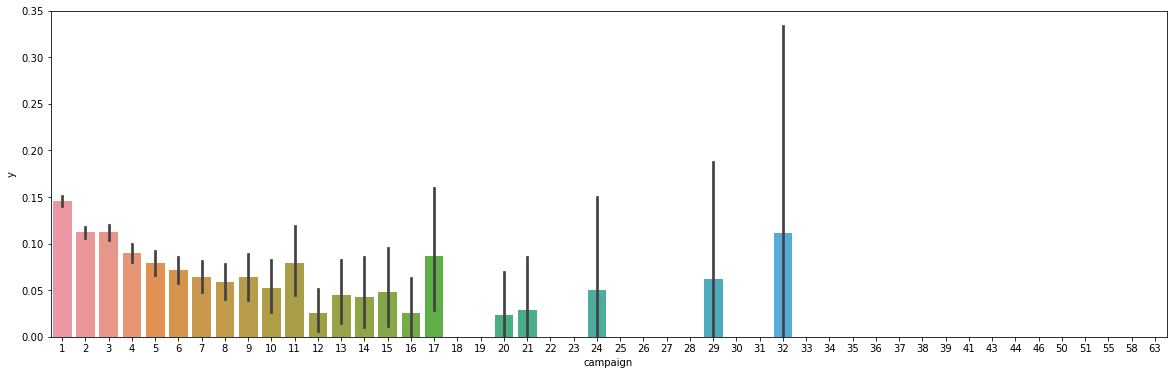

In [29]:
sns.barplot('campaign','y',data=df)

# Observation:
In this graph we can see an heavy outliers but the 1st campaign and 32 campaign have more subscribe the term deposit

<AxesSubplot:xlabel='previous', ylabel='y'>

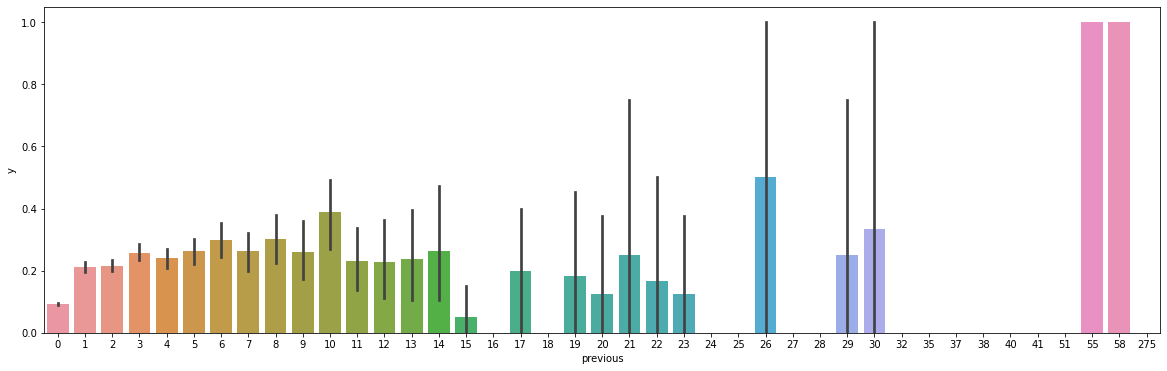

In [30]:
sns.barplot('previous','y',data=df)

<AxesSubplot:xlabel='y', ylabel='count'>

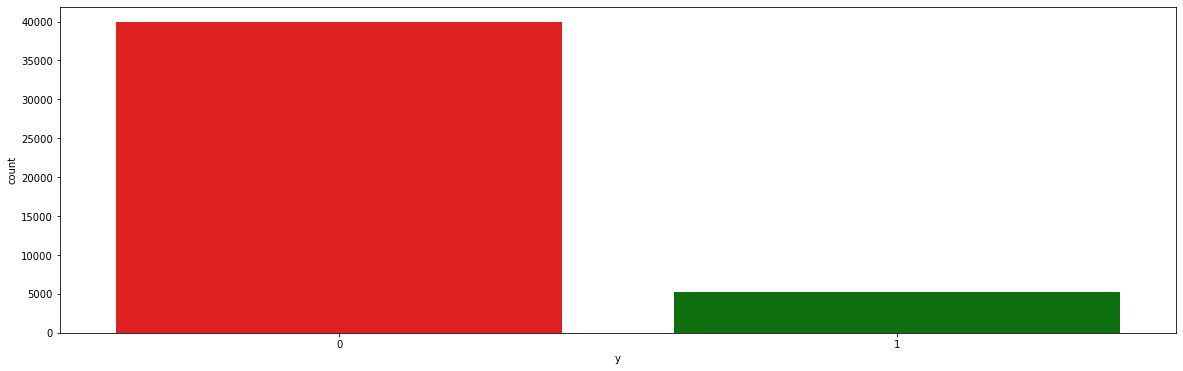

In [31]:
sns.countplot("y",data=df,palette=['red','green'])

# Observation:
In this data set we can see that most of the are not subscribe the term deposit

In [32]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

# Histogram

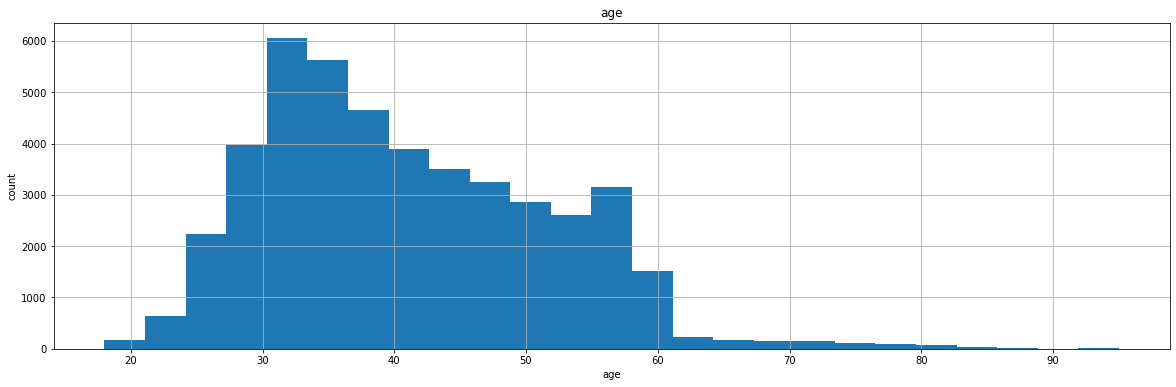

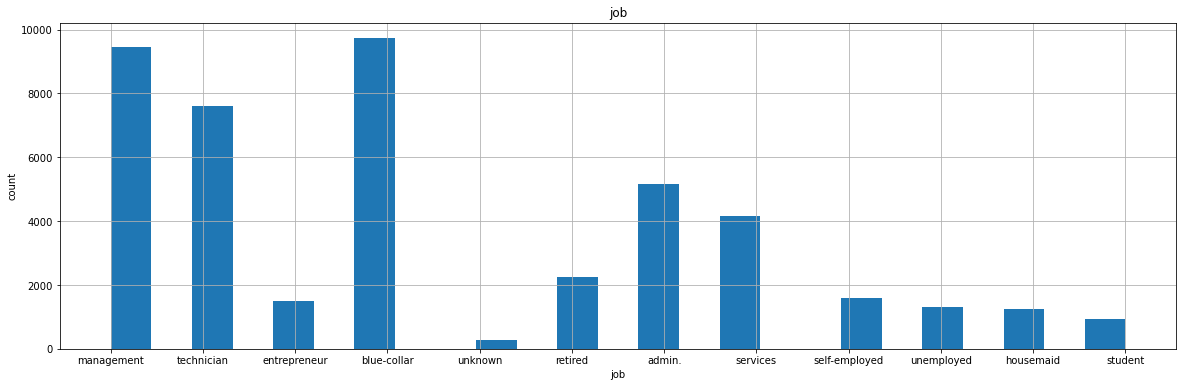

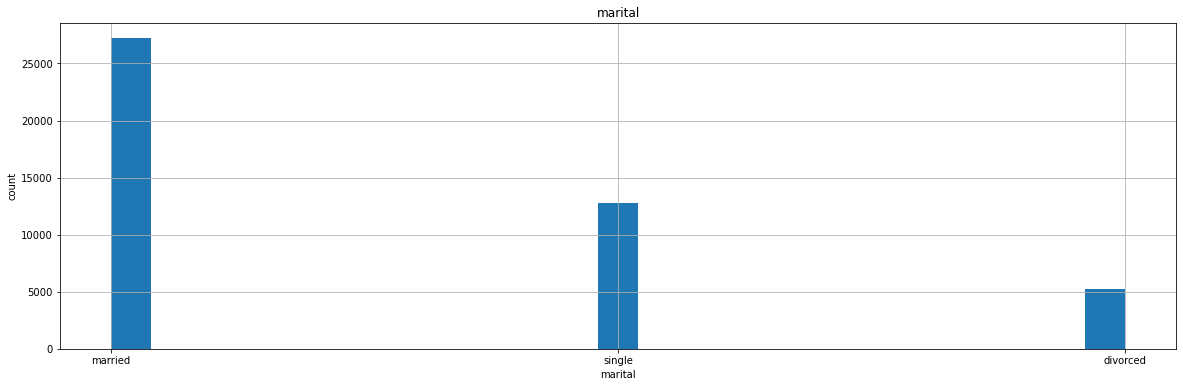

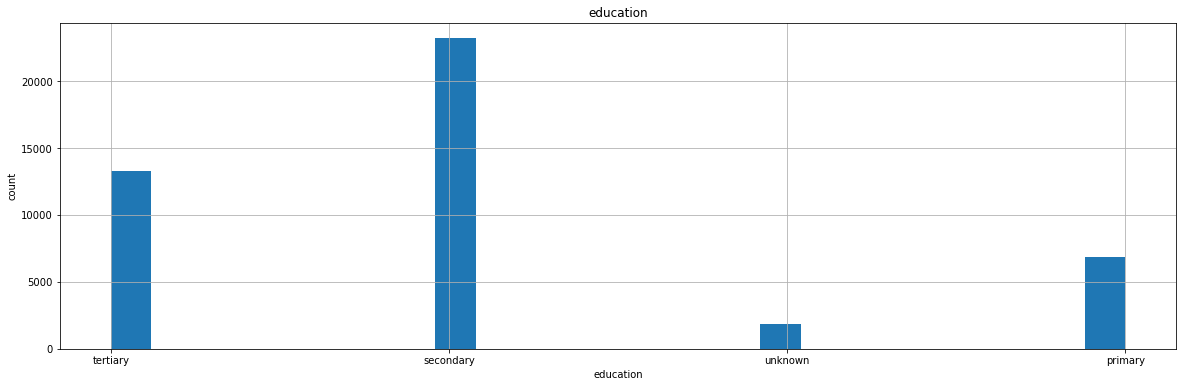

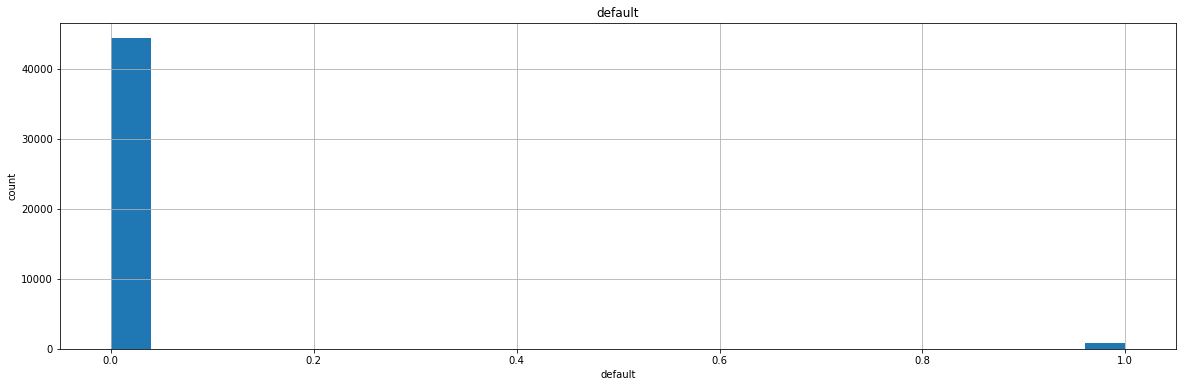

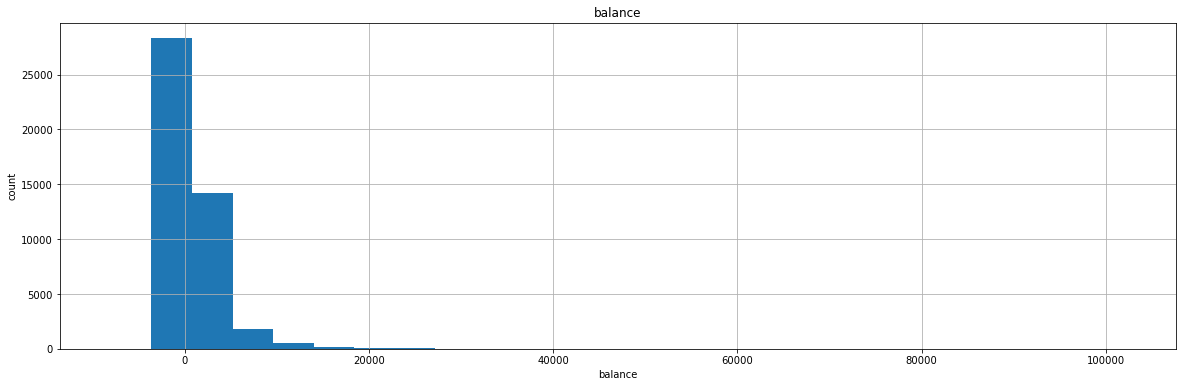

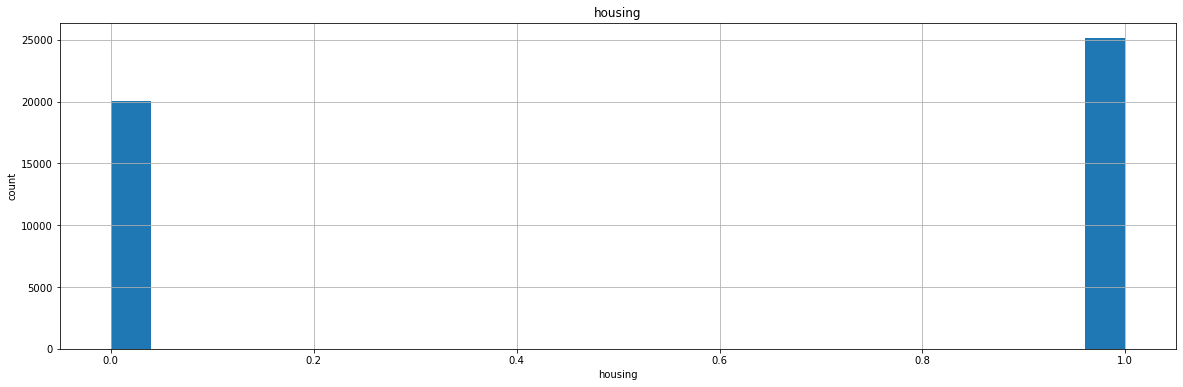

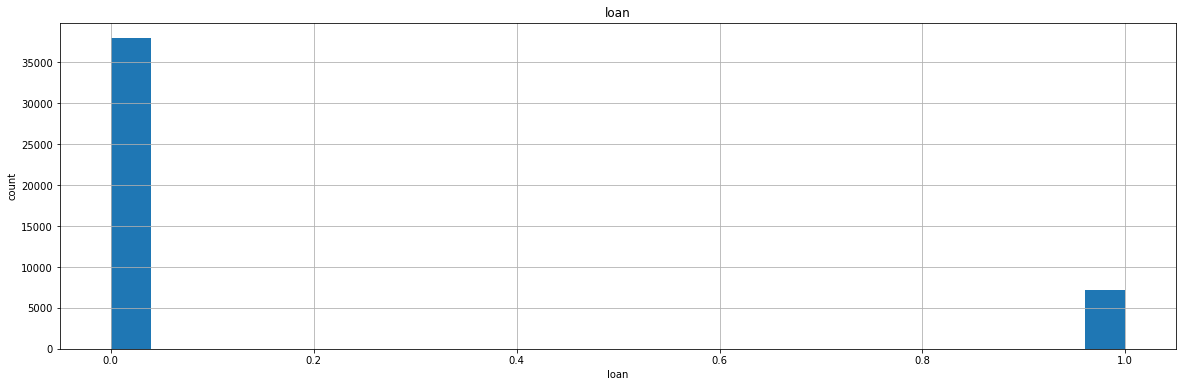

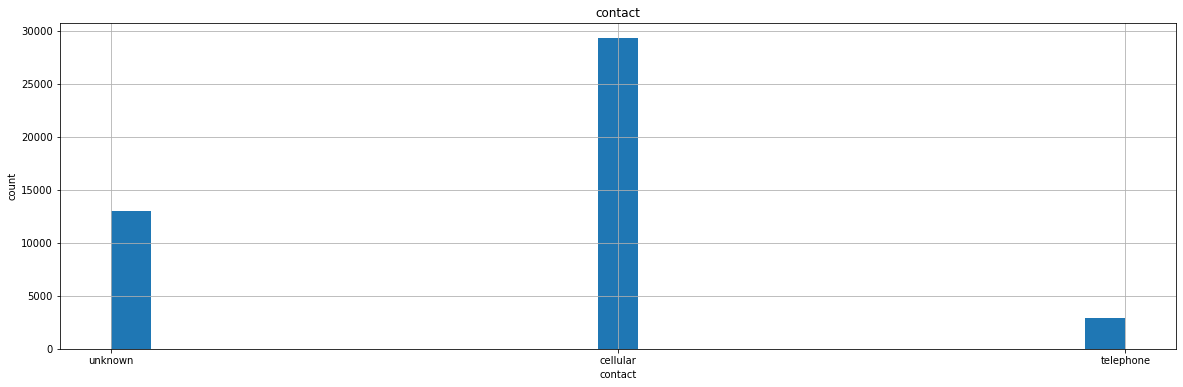

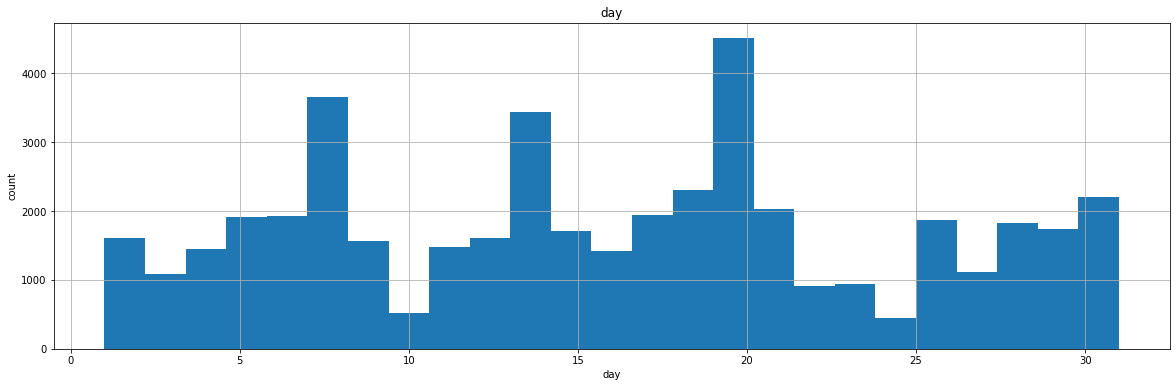

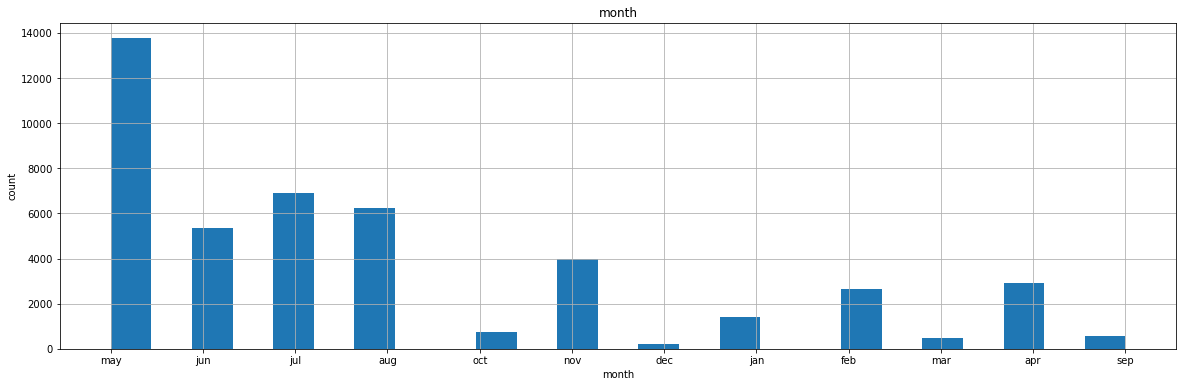

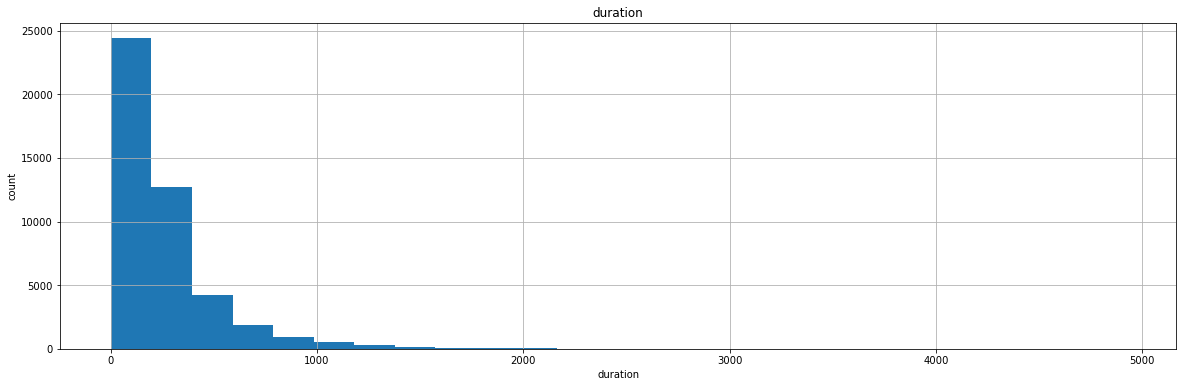

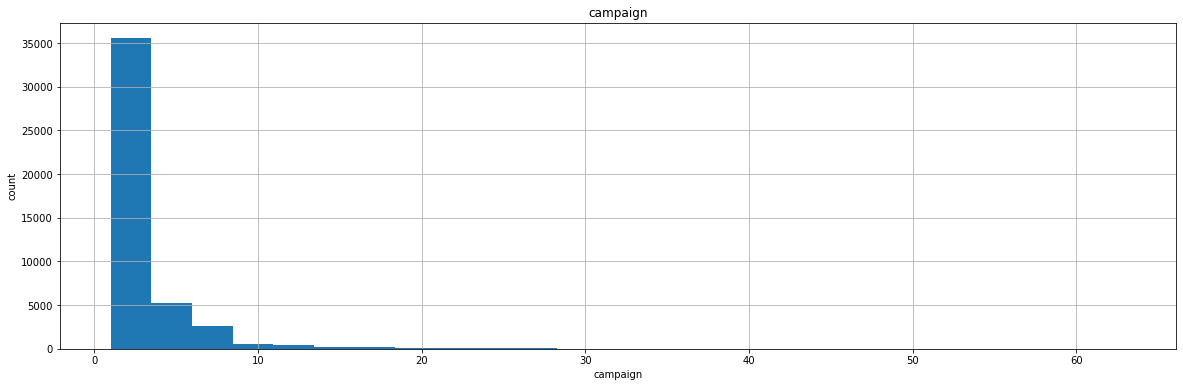

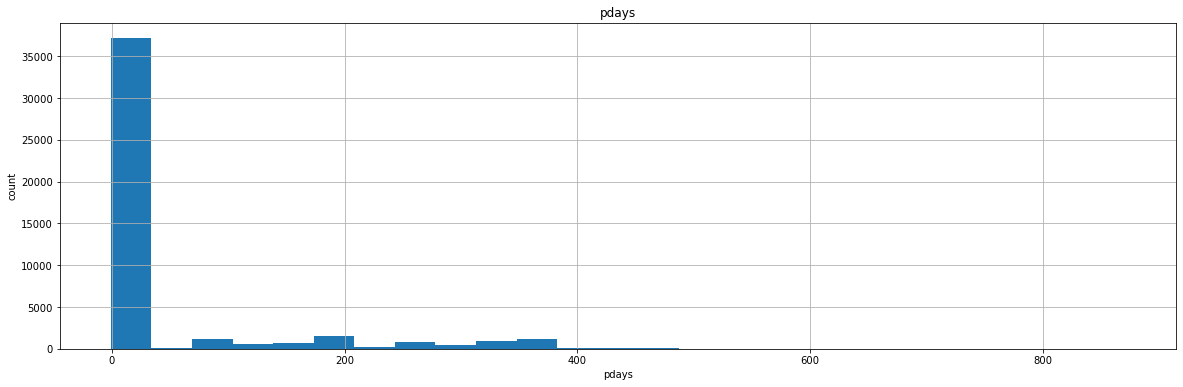

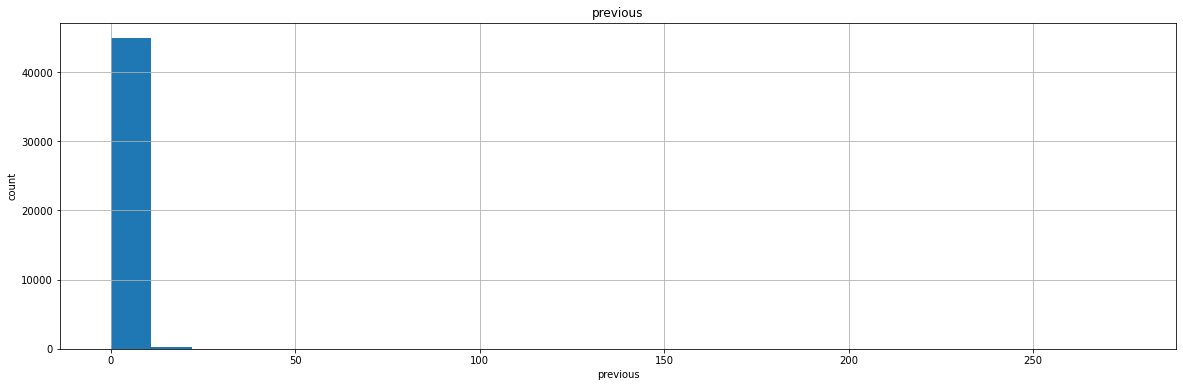

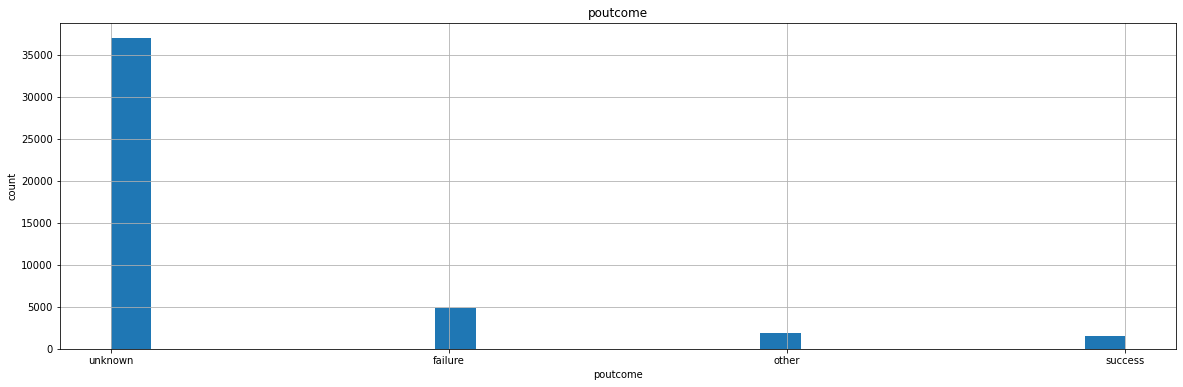

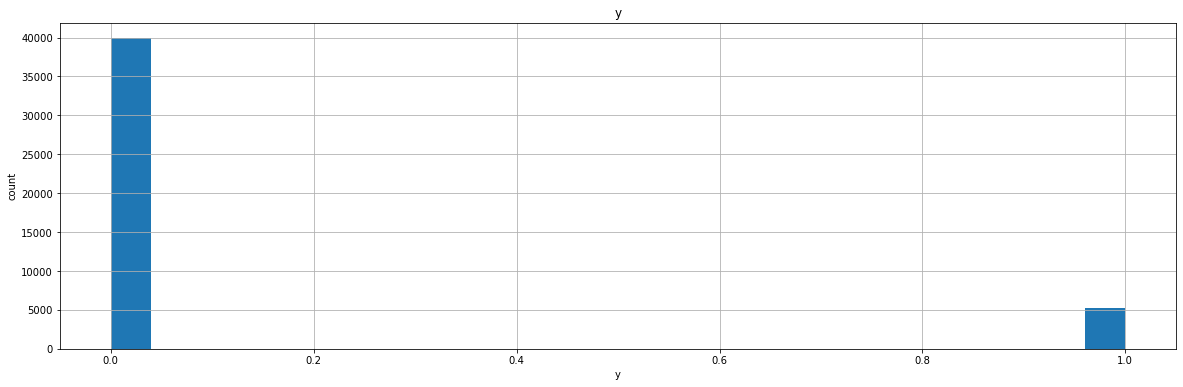

In [33]:
for feature in df:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [34]:
numerical_feature= [feature for feature in df.columns if df[feature].dtypes!='O']

In [35]:
df[numerical_feature].head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0


# Boxplot

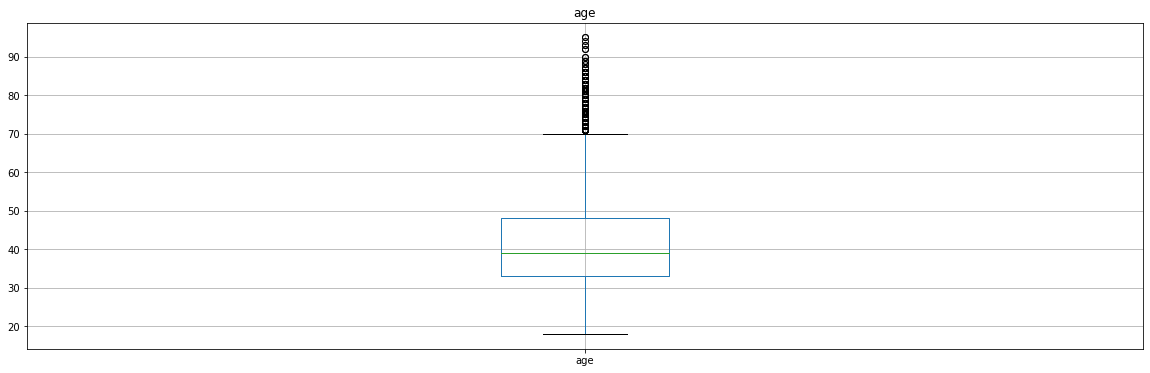

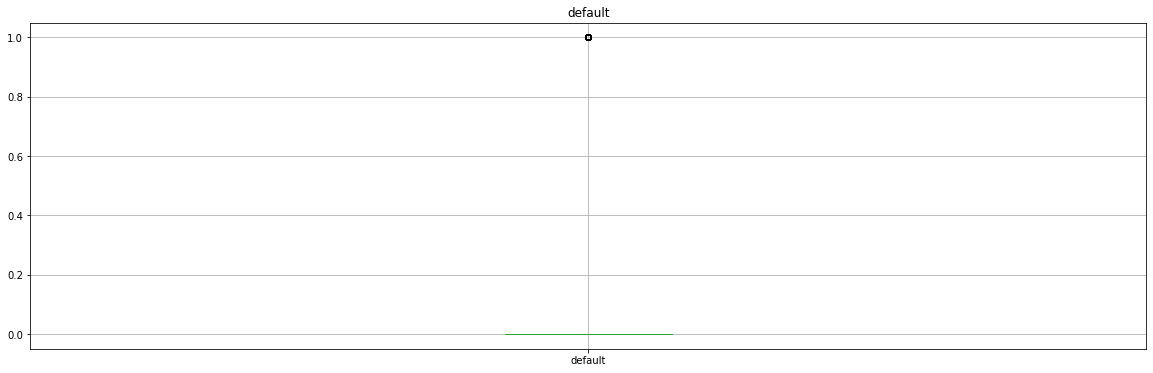

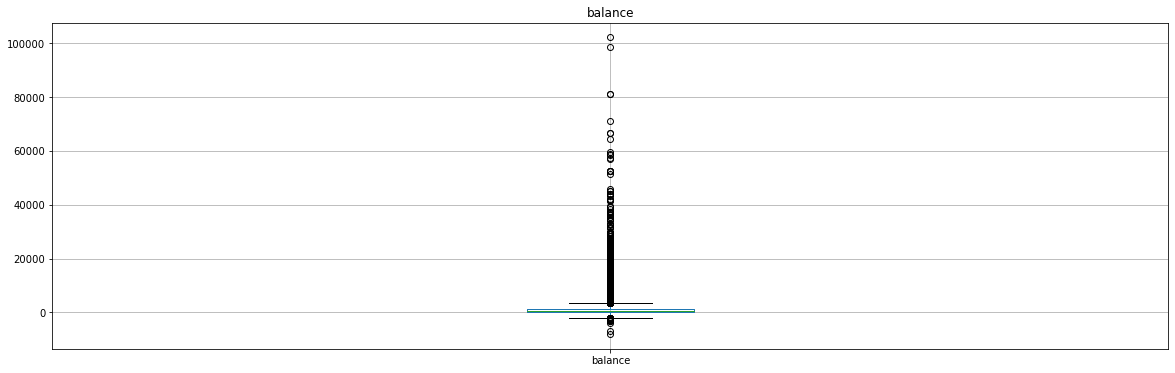

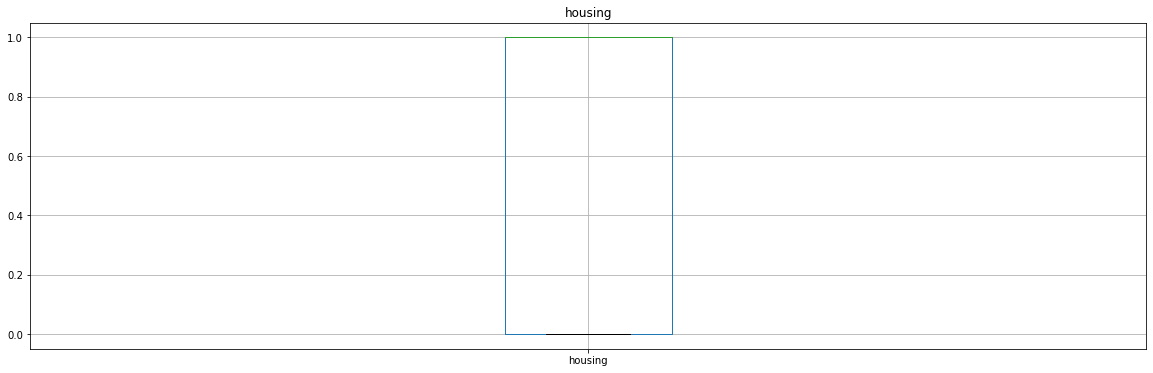

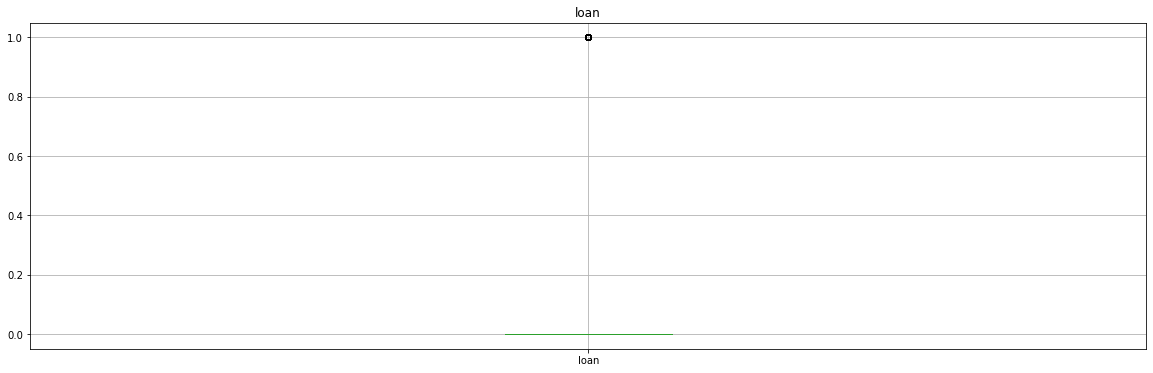

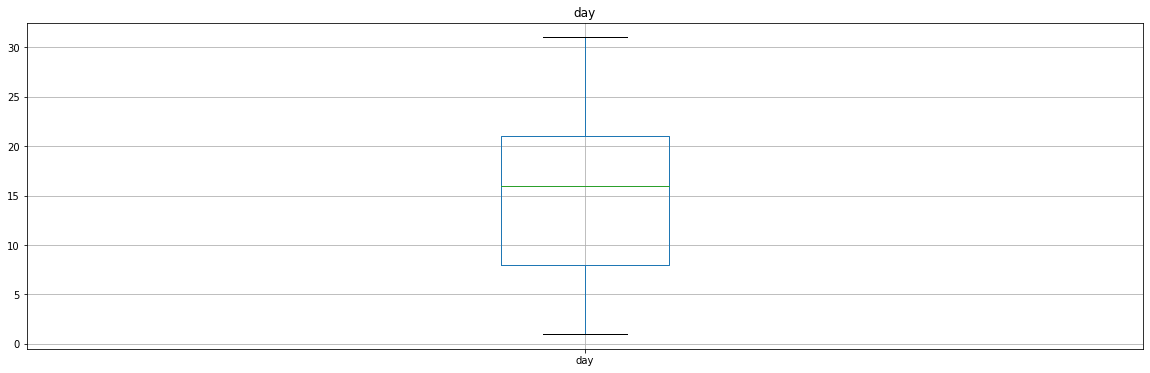

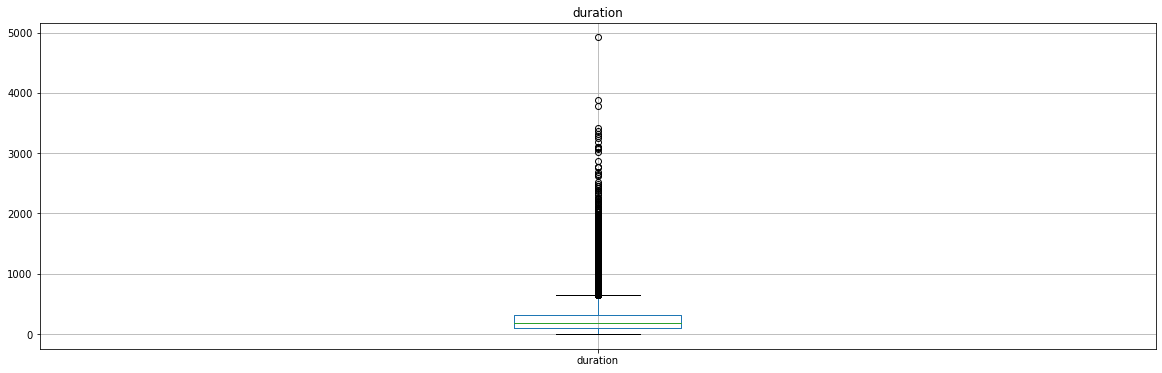

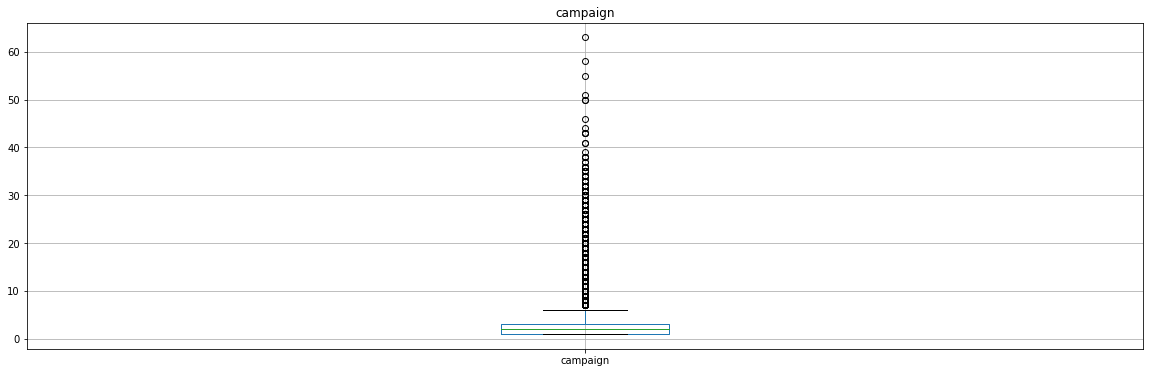

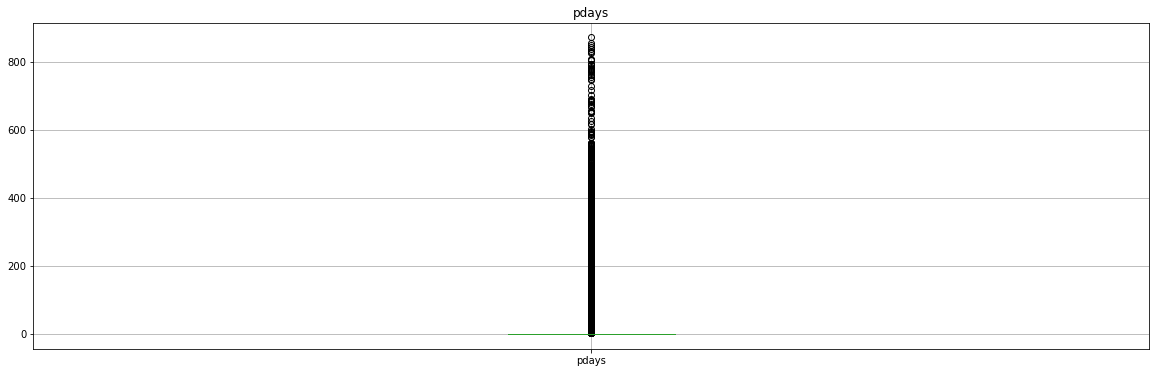

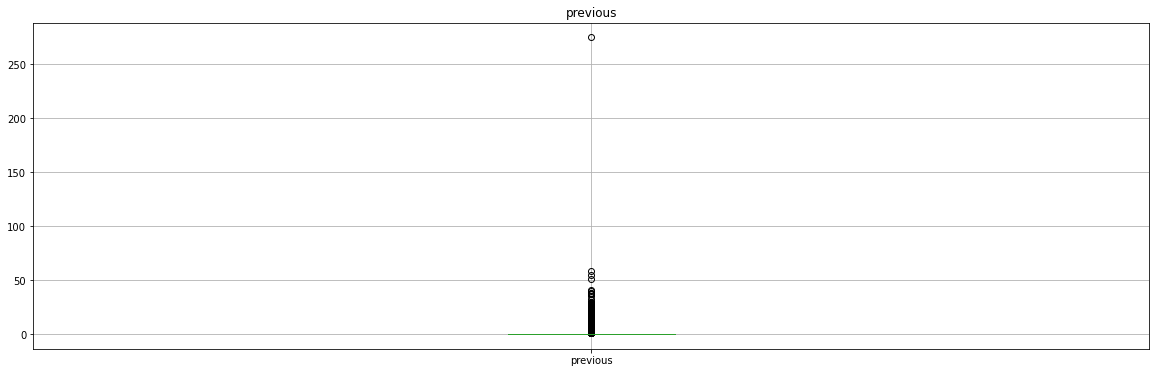

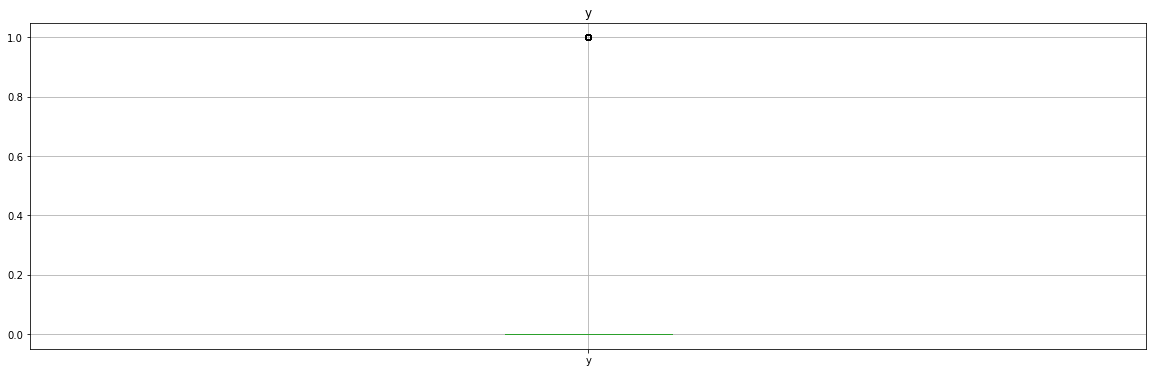

In [36]:
for feature in numerical_feature:
    data=df[numerical_feature].copy()
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

# Observation:
we can see that there is an heavy outliers in the dataset

# Coverting Categorical variable into Numeric

In [37]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [38]:
df['job']=lc.fit_transform(df['job'])
df['marital']=lc.fit_transform(df['marital'])
df['education']=lc.fit_transform(df['education'])
df['month']=lc.fit_transform(df['month'])
df['contact']=lc.fit_transform(df['contact'])
df['poutcome']=lc.fit_transform(df['poutcome'])

In [39]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


# Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [41]:
df[['age','balance','day','duration','campaign','pdays','previous']]=sc.fit_transform(df[['age','balance','day','duration','campaign','pdays','previous']])

In [42]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,4,1,2,0,0.256419,1,0,2,-1.298476,8,0.011016,-0.569351,-0.411453,-0.25194,3,0
1,0.288529,9,2,1,0,-0.437895,1,0,2,-1.298476,8,-0.416127,-0.569351,-0.411453,-0.25194,3,0
2,-0.747384,2,1,1,0,-0.446762,1,1,2,-1.298476,8,-0.707361,-0.569351,-0.411453,-0.25194,3,0
3,0.571051,1,1,3,0,0.047205,1,0,2,-1.298476,8,-0.645231,-0.569351,-0.411453,-0.25194,3,0
4,-0.747384,11,2,3,0,-0.447091,0,0,2,-1.298476,8,-0.233620,-0.569351,-0.411453,-0.25194,3,0


# Create Model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score as ac


# Deifining X and Y

In [44]:
X = df.iloc[:,:16]

In [45]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,4,1,2,0,0.256419,1,0,2,-1.298476,8,0.011016,-0.569351,-0.411453,-0.251940,3
1,0.288529,9,2,1,0,-0.437895,1,0,2,-1.298476,8,-0.416127,-0.569351,-0.411453,-0.251940,3
2,-0.747384,2,1,1,0,-0.446762,1,1,2,-1.298476,8,-0.707361,-0.569351,-0.411453,-0.251940,3
3,0.571051,1,1,3,0,0.047205,1,0,2,-1.298476,8,-0.645231,-0.569351,-0.411453,-0.251940,3
4,-0.747384,11,2,3,0,-0.447091,0,0,2,-1.298476,8,-0.233620,-0.569351,-0.411453,-0.251940,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,9,1,2,0,-0.176460,0,0,0,0.143418,9,2.791329,0.076230,-0.411453,-0.251940,3
45207,2.831227,5,0,0,0,0.120447,0,0,0,0.143418,9,0.768224,-0.246560,-0.411453,-0.251940,3
45208,2.925401,5,1,1,0,1.429593,0,0,0,0.143418,9,3.373797,0.721811,1.436189,1.050473,2
45209,1.512791,1,1,1,0,-0.228024,0,0,1,0.143418,9,0.970146,0.399020,-0.411453,-0.251940,3


In [46]:
Y = df[['y']]

In [47]:
Y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


# Spliting the data into train and test data

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=0,shuffle=True)

In [49]:
x_train.shape

(31647, 16)

In [50]:
y_train.shape

(31647, 1)

# Applying Logistic Regression

In [51]:
Classifier = LogisticRegression()
Classifier.fit(x_train,y_train)

LogisticRegression()

In [52]:
y_train_pred = Classifier.predict(x_train)

# Checking Accuracy Score of Train and Test Data

In [53]:
ac(y_train,y_train_pred)

0.892470060353272

In [54]:
y_test_pred = Classifier.predict(x_test)

In [55]:
ac(y_test,y_test_pred)

0.8883810085520495

In [56]:
Classifier.intercept_

array([-2.92593859])

In [57]:
Classifier.coef_

array([[ 0.08430893,  0.01034954,  0.21638503,  0.17622239, -0.3973347 ,
         0.06292144, -1.05030191, -0.74865783, -0.6999734 , -0.04769687,
         0.04535047,  1.04911776, -0.40308219,  0.35843927,  0.18328335,
         0.23132832]])

# Confusion Matrix

In [58]:
confusion_matrix = confusion_matrix(y_test_pred,y_test)
print(confusion_matrix)

[[11703  1248]
 [  266   347]]


# Classification report of Training Data

In [59]:
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     30256
           1       0.23      0.60      0.33      1391

    accuracy                           0.89     31647
   macro avg       0.60      0.76      0.64     31647
weighted avg       0.95      0.89      0.91     31647



# Classification report of Test data

In [60]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     12951
           1       0.22      0.57      0.31       613

    accuracy                           0.89     13564
   macro avg       0.60      0.73      0.63     13564
weighted avg       0.94      0.89      0.91     13564



# ROC Curve and AUC Score

Text(0, 0.5, 'True Positive Rate')

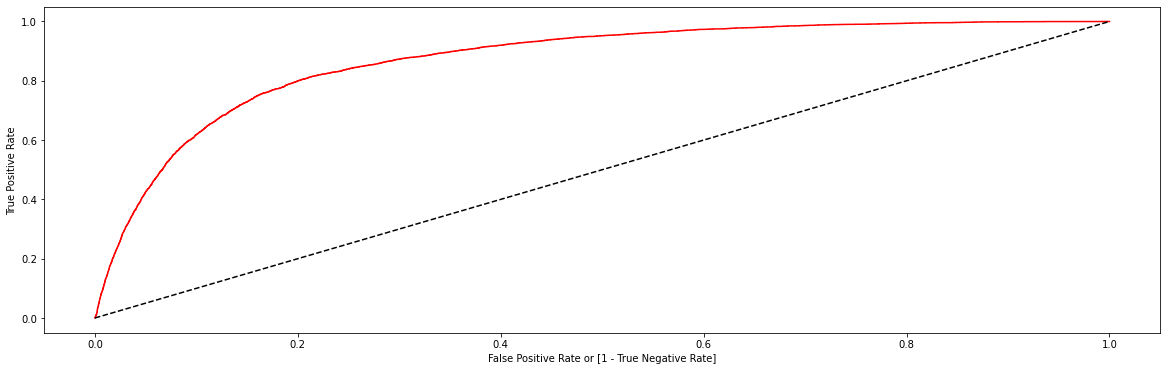

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, Classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_test, y_test_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [62]:
auc

0.597665390031877